# Chicago Crimes Analysis

## Import Libraries

In [1]:
import pandas as pd # Dataframe operations
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Plots

from datetime import datetime # Convert to datetime 

plt.rcParams['figure.figsize'] = [10, 5]

## Load Data

Data of crimes in Chicago since 2017 until 2023

In [3]:
df = pd.read_csv("Data/Chicago_Crimes_2017-2023.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13327763,JH103488,12/31/2023 11:59:00 PM,010XX N ORLEANS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,27.0,8.0,14,1173727.0,1907173.0,2023,01/08/2024 03:59:56 PM,41.900698,-87.637330,"(41.900698378, -87.637329754)"
1,13325009,JH100002,12/31/2023 11:51:00 PM,051XX S PRINCETON AVE,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,...,20.0,37.0,04A,1175152.0,1871065.0,2023,01/17/2024 03:41:31 PM,41.801584,-87.633177,"(41.801583507, -87.633177068)"
2,13324997,JH100010,12/31/2023 11:51:00 PM,009XX E 77TH ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,8.0,69.0,04A,1183685.0,1854148.0,2023,01/08/2024 03:59:56 PM,41.754967,-87.602411,"(41.754966726, -87.602410989)"
3,13327752,JH102557,12/31/2023 11:50:00 PM,001XX W WACKER DR,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,42.0,32.0,06,1175349.0,1902127.0,2023,01/08/2024 03:59:56 PM,41.886816,-87.631524,"(41.886815622, -87.631523712)"
4,13324881,JH100006,12/31/2023 11:50:00 PM,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,14.0,63.0,08B,1159244.0,1870437.0,2023,01/08/2024 03:59:56 PM,41.800201,-87.691535,"(41.800200965, -87.691535096)"


In [4]:
# Shape
df.shape

(1722109, 22)

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722109 entries, 0 to 1722108
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [8]:
df.isnull().any()

ID                      False
Case Number             False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
District                 True
Ward                     True
Community Area           True
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Updated On              False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

In [6]:
# columns
columns = df.columns.values.tolist()
columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

The description of each column is showed in the [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2)

## Exploratory Data Analysis (EDA)

In [7]:
# Convert date columns int date_time type

df["Date"] = pd.to_datetime(df["Date"])
df["Updated On"] = pd.to_datetime(df["Updated On"])
df.head()

C:\Users\acast\AppData\Local\Temp\ipykernel_5464\778599175.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\acast\AppData\Local\Temp\ipykernel_5464\778599175.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Updated On"] = pd.to_datetime(df["Updated On"])


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13327763,JH103488,2023-12-31 23:59:00,010XX N ORLEANS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,27.0,8.0,14,1173727.0,1907173.0,2023,2024-01-08 15:59:56,41.900698,-87.637330,"(41.900698378, -87.637329754)"
1,13325009,JH100002,2023-12-31 23:51:00,051XX S PRINCETON AVE,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,...,20.0,37.0,04A,1175152.0,1871065.0,2023,2024-01-17 15:41:31,41.801584,-87.633177,"(41.801583507, -87.633177068)"
2,13324997,JH100010,2023-12-31 23:51:00,009XX E 77TH ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,8.0,69.0,04A,1183685.0,1854148.0,2023,2024-01-08 15:59:56,41.754967,-87.602411,"(41.754966726, -87.602410989)"
3,13327752,JH102557,2023-12-31 23:50:00,001XX W WACKER DR,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,42.0,32.0,06,1175349.0,1902127.0,2023,2024-01-08 15:59:56,41.886816,-87.631524,"(41.886815622, -87.631523712)"
4,13324881,JH100006,2023-12-31 23:50:00,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,14.0,63.0,08B,1159244.0,1870437.0,2023,2024-01-08 15:59:56,41.800201,-87.691535,"(41.800200965, -87.691535096)"


In [7]:
# Extract date information

df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_Week"] = df["Date"].dt.dayofweek
df["Hour"] = df["Date"].dt.hour
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
0,12137388,JD334537,2018-01-01,010XX W NEWPORT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,...,NaN,2018,2020-08-17 15:50:01,NaN,NaN,NaN,1,1,0,0
1,11196173,JB105519,2018-01-01,075XX S ST LOUIS AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,...,1854412.0,2018,2018-05-04 15:51:04,41.756325,-87.709916,"(41.756324845, -87.709916401)",1,1,0,0
2,11198738,JB108247,2018-01-01,0000X S COLUMBUS DR,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,1900315.0,2018,2018-05-04 15:51:04,41.881777,-87.620768,"(41.881776822, -87.620767948)",1,1,0,0
3,11212228,JB127156,2018-01-01,109XX S HALSTED ST,0810,THEFT,OVER $500,NURSING HOME/RETIREMENT HOME,False,False,...,1832289.0,2018,2018-05-04 15:51:04,41.695227,-87.642468,"(41.69522655, -87.642467755)",1,1,0,0
4,11220328,JB137687,2018-01-01,038XX N DRAKE AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,True,True,...,1925257.0,2018,2018-05-04 15:51:04,41.950778,-87.716502,"(41.950777548, -87.716502434)",1,1,0,0


**1. How is the change of numbers of crimes in the last years?**

In [8]:
df_crimes_year = pd.DataFrame(df.groupby(by = "Year").size()).reset_index()
df_crimes_year


,Year,0
0,2018,268685
1,2019,261144
2,2020,211932
3,2021,207934
4,2022,194101


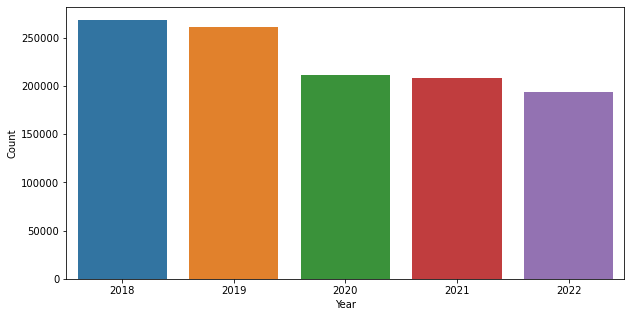

In [9]:
sns.barplot(x = "Year", y = 0, data = df_crimes_year)
plt.ylabel("Count")
plt.show()

**Answer**
...

**2. Did the pandemic affect the rate of crimes in Chicago?**

**Answer**

**3. What are the months, days of the week, and time of day with the highest crime rates?**

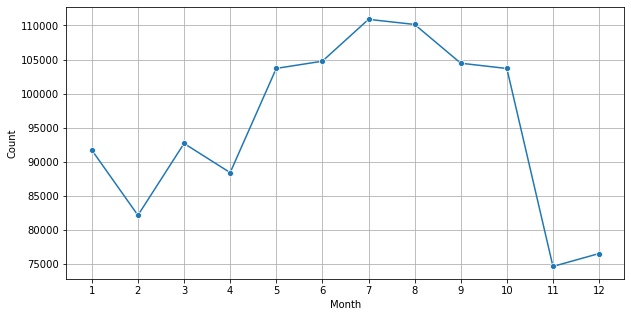

In [10]:
# Month

sns.lineplot(x = "Month", 
             y = 0, 
             data = pd.DataFrame(df.groupby(by = "Month").size()).reset_index(), 
             marker = "o")
plt.ylabel("Count")
plt.xticks(range(1,13))
plt.grid()
plt.show()

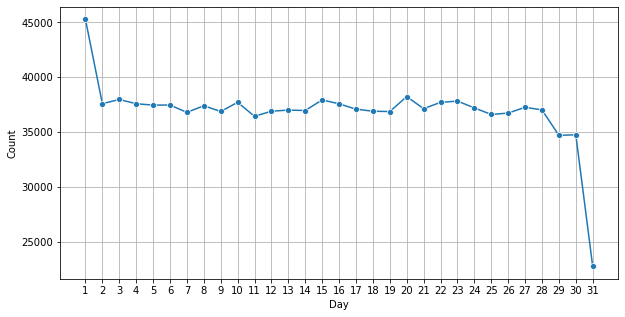

In [14]:
# Day
sns.lineplot(x = "Day", 
             y = 0, 
             data = pd.DataFrame(df.groupby(by = "Day").size()).reset_index(), 
             marker = "o")
plt.ylabel("Count")
plt.xticks(range(1,32))
plt.grid()
plt.show()

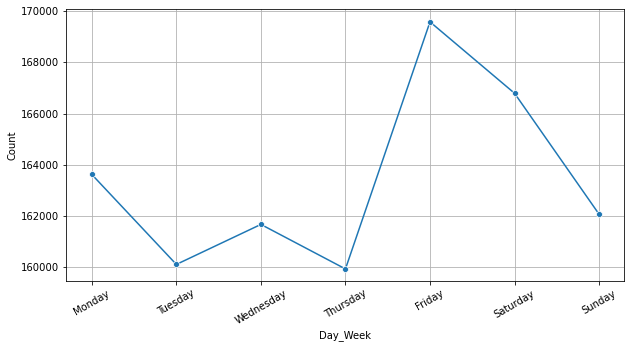

In [12]:
# Dayweek

ax = sns.lineplot(x = "Day_Week", 
             y = 0, 
             data = pd.DataFrame(df.groupby(by = "Day_Week").size()).reset_index(), 
             marker = "o")
ax.set_ylabel("Count")
ax.set_xticks(range(0,7))
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                  rotation = 30)
plt.grid()
plt.show()

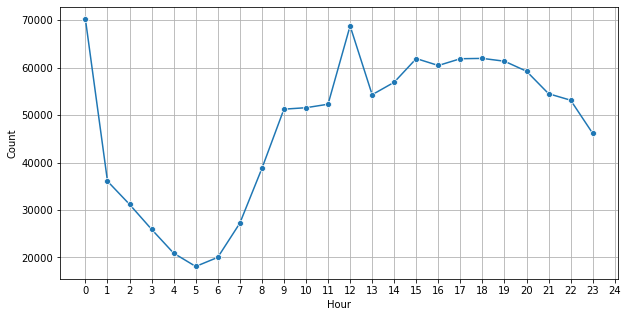

In [13]:
# Hour
sns.lineplot(x = "Hour", 
             y = 0, 
             data = pd.DataFrame(df.groupby(by = "Hour").size()).reset_index(), 
             marker = "o")
plt.ylabel("Count")
plt.xticks(range(0,25))
plt.grid()
plt.show()

**Answer**
...

**4. What are the most common Types of Crimes?**

In [21]:
df_most_crimes =pd.DataFrame(df.groupby(by = "Primary Type").size()).reset_index()
df_most_crimes.columns = ["Primary Type", "Count"]
df_most_crimes.sort_values(by = "Count", ascending = False, inplace = True)
df_most_crimes

,Primary Type,Count
32,THEFT,254855
2,BATTERY,215858
6,CRIMINAL DAMAGE,126808
1,ASSAULT,97049
9,DECEPTIVE PRACTICE,86046
24,OTHER OFFENSE,72688
17,MOTOR VEHICLE THEFT,55124
18,NARCOTICS,44460
3,BURGLARY,42972
29,ROBBERY,40652


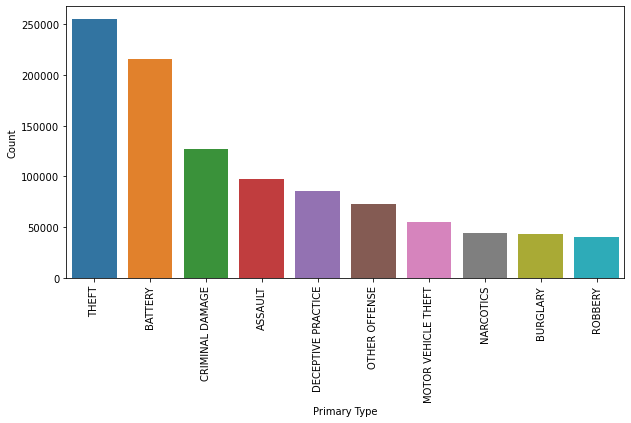

In [26]:
sns.barplot(x = "Primary Type", 
             y = "Count", 
             data = df_most_crimes[0:10])
plt.xticks(rotation = 90)
plt.show()

**Asnwer**---